In [242]:
pip install prophet

  Using cached prophet-1.1.1-cp38-cp38-win_amd64.whl (12.1 MB)
  Using cached cmdstanpy-1.0.8-py3-none-any.whl (81 kB)
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.36.2
    Uninstalling wheel-0.36.2:
      Successfully uninstalled wheel-0.36.2
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
Note: you may need to restart the kernel to use updated packages.


# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import seaborn as sns

C:\Users\Ale\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Загрузка датасета


In [144]:
df=pd.read_csv('world-happiness-report.csv')

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** - мера удовлетворенности жизнью.
*  **SD of Ladder** - Стандартное отклонениеe ladder.
*  **Positive affect** Мера положительных эмоций.
*  **Negative affect** Мера отрицательной эмоции.
*  **Social support** Социальная поддержка.
*  **Freedom** Степень свободы.
*  **Corruption** Степень коррупции.
*  **Generosity** Щедрость.
*  **Log of GDP per capita** Логарифм ВВП на душу населения.
*  **Healthy life expectancy** Ожидаемая продолжительность здоровой жизни.

Посмотреть первые несколько рядов таблицы

In [145]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

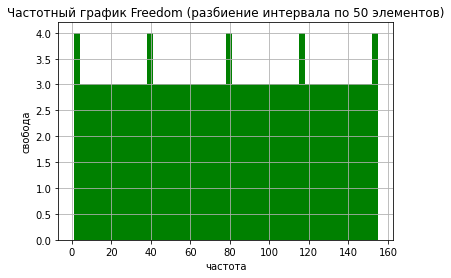

In [146]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Freedom'], 50, facecolor='g')

plt.xlabel('частота')
plt.ylabel('свобода')
plt.title('Частотный график Freedom (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

In [147]:
df['Freedom']

0        5.0
1        6.0
2        3.0
3        7.0
4       19.0
       ...  
151     21.0
152     78.0
153    155.0
154    133.0
155    154.0
Name: Freedom, Length: 156, dtype: float64

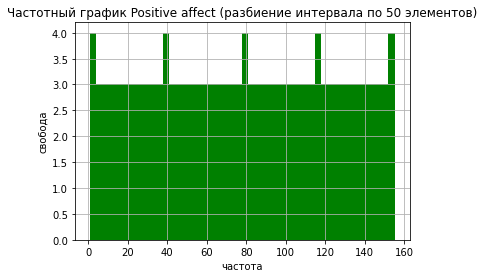

In [148]:
n, bins, patches = plt.hist(df['Positive affect'], 50, facecolor='g')

plt.xlabel('частота')
plt.ylabel('свобода')
plt.title('Частотный график Positive affect (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

In [149]:
df['Positive affect']

0       41.0
1       24.0
2       16.0
3        3.0
4       12.0
       ...  
151     54.0
152     78.0
153    152.0
154    132.0
155    127.0
Name: Positive affect, Length: 156, dtype: float64

Вывод: Выборки с параметром Freedom и с параметром Positive affect это равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [150]:
statistics.mode(df['Freedom'])

5.0

In [151]:
statistics.mean(df['Freedom'])

nan

In [152]:
statistics.median(df['Freedom'])

71.0

In [153]:
statistics.pstdev(df['Freedom'])

nan

In [154]:
print('min:',min(df['Freedom']),'max:', max(df['Freedom']))

min: 1.0 max: 155.0


In [155]:
max(df['Freedom'])- min(df['Freedom'])

154.0

In [156]:
df = df.dropna(subset=['Freedom'])


In [157]:
df['Freedom'].isnull().sum()

0

Почему нельзя найти моду?

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

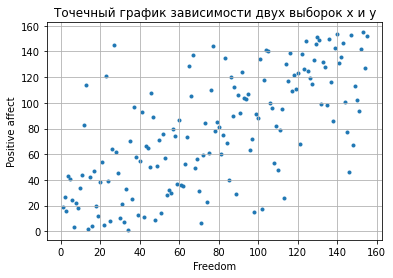

In [158]:
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(df['Freedom'], df['Positive affect'], marker='.')

In [160]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['Freedom'], df['Positive affect'])
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: 0.6817698430601657


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [142]:
freedom = df['Freedom']
print(statistics.mean(freedom))

78.0


In [161]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [162]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

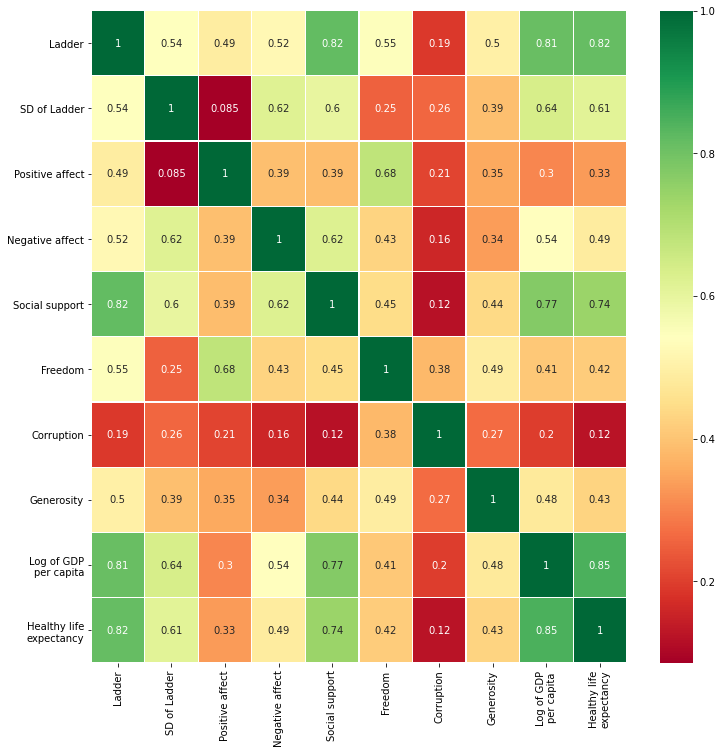

In [163]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()


В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

Загрузить таблицу цен на авокадо: 

*   Date - день показания
*   AveragePrice - средняя цена на один авокадо (авокадо продаются обычно в брикетах по несколько штук)
*   Total Volume - сколько всего было куплено авокадо
*   4046 - общее количество авокадо с кодом 4046
*   4225 - общее количество авокадо с кодом 4225
*   4770 - общее количество авокадо с кодом 4770
*   Total Bags - количество проданных брикетов всего
*   Small Bags - количество проданных малых брикетов
*   Large Bags - количество проданных больших брикетов
*   XLarge Bags - количество проданных XLarge брикетов
*   type - conventional или organic
*   year - год продажи
*   region - регион показаний


In [2]:
import io
import requests
avo=pd.read_csv('avocado.csv')
avo

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Сделать частотный график колонки AveragePrice. Какое это распределение?

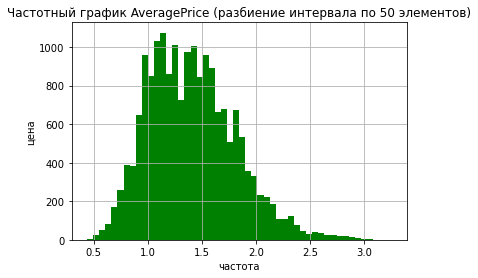

In [3]:
n, bins, patches = plt.hist(avo['AveragePrice'], 50, facecolor='g')

plt.xlabel('частота')
plt.ylabel('цена')
plt.title('Частотный график AveragePrice (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

In [4]:
from scipy.stats import shapiro
shapiro(avo['AveragePrice'])

C:\Users\Ale\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9786123633384705, pvalue=2.802596928649634e-45)

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [5]:
avo_corr = avo[['AveragePrice', '4046', '4225', '4770']]

In [6]:
avo.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
avo['Date'] = pd.to_datetime(avo['Date'])

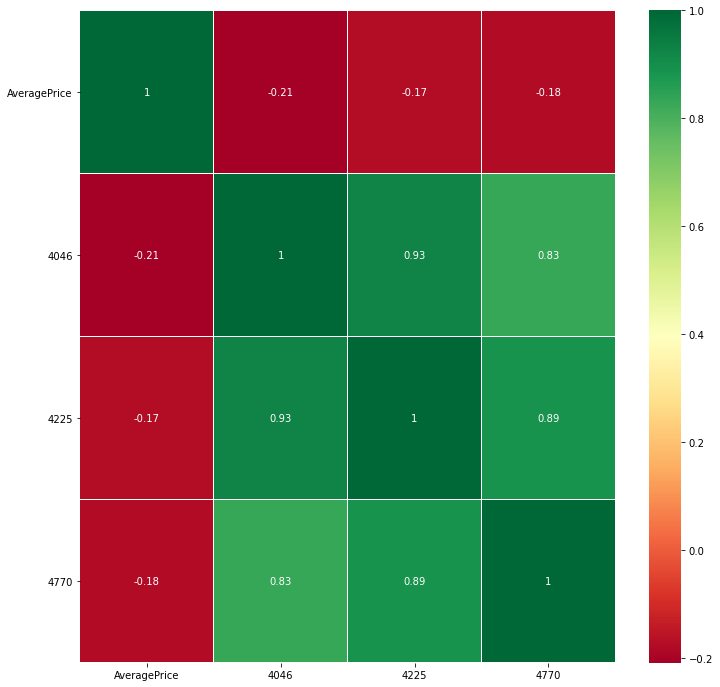

In [8]:
sns.heatmap(avo_corr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

При увеличении цены (Average Price), несколько понижается количество продаж авокадо всех сортов, особенно сорта 4046

Написать временные предсказания цен на авокадо типа organic для выбранного региона: LasVegas, начиная с августа 2017 года до конца марта 2018. В качестве тренировочных данных использовать данные до июля 2017 года включительно.
В качестве примера использовать лекционный материал в lecture_1.ipynb

In [9]:
avo_Vegas_org = avo.query('region=="LasVegas" & type=="organic"')
avo_Vegas_org 

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10218,0,2015-12-27,1.94,4595.50,1188.98,2391.02,0.0,1015.50,701.41,314.09,0.0,organic,2015,LasVegas
10219,1,2015-12-20,1.99,4921.37,1672.16,2841.33,0.0,407.88,258.73,149.15,0.0,organic,2015,LasVegas
10220,2,2015-12-13,1.89,5606.22,1979.71,3117.37,0.0,509.14,408.49,100.65,0.0,organic,2015,LasVegas
10221,3,2015-12-06,1.97,4459.56,2223.41,2159.48,0.0,76.67,76.67,0.00,0.0,organic,2015,LasVegas
10222,4,2015-11-29,2.17,3996.06,1460.87,2505.19,0.0,30.00,30.00,0.00,0.0,organic,2015,LasVegas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17860,7,2018-02-04,1.79,9503.13,1479.32,1512.78,0.0,6511.03,6465.39,45.64,0.0,organic,2018,LasVegas
17861,8,2018-01-28,1.78,8672.12,1005.73,2110.22,0.0,5556.17,5538.46,17.71,0.0,organic,2018,LasVegas
17862,9,2018-01-21,1.91,7491.53,1096.07,1280.31,0.0,5115.15,5115.15,0.00,0.0,organic,2018,LasVegas
17863,10,2018-01-14,1.98,9883.94,1497.55,2199.58,0.0,6186.81,6180.41,6.40,0.0,organic,2018,LasVegas


In [10]:
avo_date_price = avo_Vegas_org[['Date', 'AveragePrice']].reset_index(drop=True)
avo_date_price 

,Date,AveragePrice
0,2015-12-27,1.94
1,2015-12-20,1.99
2,2015-12-13,1.89
3,2015-12-06,1.97
4,2015-11-29,2.17
...,...,...
164,2018-02-04,1.79
165,2018-01-28,1.78
166,2018-01-21,1.91
167,2018-01-14,1.98


<AxesSubplot:xlabel='Date'>

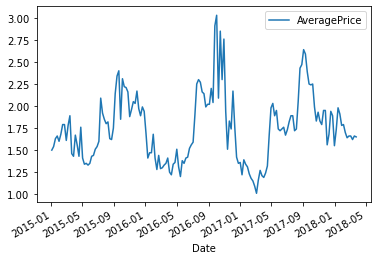

In [11]:
avo_date_price.plot(x='Date', y='AveragePrice', kind="line")

Итак, у нас есть исторические данные, и мы хотим предсказать на их основе, как будет меняться цена в будущем. Для этого можно использовать разные методы. Допустим, мы хотим реализовать имеющийся инструмент - Prophet

Во-первых, переименуем столбцы как того требует prophet.

In [12]:
avo_date_price = avo_date_price.rename(columns={'Date':'ds', 'AveragePrice':'y'})

Во-вторых, разделим данные на 80% тренировочных и на 20% тестовых:

In [13]:
avo_date_price = avo_date_price.sort_values(by='ds')

In [14]:
amount_80 = int(len(avo_date_price)*0.8)
amount_80

135

In [15]:
amount_80 = int(len(avo_date_price)*0.8)
train_price = avo_date_price[:amount_80]
test_price = avo_date_price[amount_80:]

In [16]:
train_price.head()

,ds,y
51,2015-01-04,1.50
50,2015-01-11,1.54
49,2015-01-18,1.63
48,2015-01-25,1.66
47,2015-02-01,1.60


In [17]:
test_price.head()

,ds,y
125,2017-08-06,1.74
124,2017-08-13,2.05
123,2017-08-20,2.43
122,2017-08-27,2.47
121,2017-09-03,2.64


В-третьих, обучим модель:

In [250]:
from prophet import Prophet

In [248]:
import cmdstanpy
cmdstanpy.install_cmdstan()
cmdstanpy.install_cmdstan(compiler=True) 

Installing CmdStan version: 2.30.1
Install directory: C:\Users\Ale\.cmdstan
Download successful, file: C:\Users\Ale\AppData\Local\Temp\tmpv3wjw88k
Extracting distribution


21:21:14 - cmdstanpy - WARNING - CmdStan installation failed.
Command "make build" failed
Command: ['mingw32-make', 'build', '-j1']
failed with error [WinError 2] Не удается найти указанный файл



Unpacked download as cmdstan-2.30.1
Building version cmdstan-2.30.1, may take several minutes, depending on your system.
Installing CmdStan version: 2.30.1
Install directory: C:\Users\Ale\.cmdstan
Installing RTools40
C++ toolchain 'RTools' version: 4.0
Install directory: C:\Users\Ale\.cmdstan
Download successful, file: RTools40.exe
Installing the C++ toolchain: RTools40
RTools40.exe /SP- /SILENT /SUPPRESSMSGBOXES /CURRENTUSER LANG="English" /DIR="Users\Ale\.cmdstan\RTools40" /NOICONS /NORESTART
Installed RTools40
pacman -Sy mingw-w64-x86_64-make --noconfirm


21:24:17 - cmdstanpy - INFO - Add C++ toolchain to $PATH: C:\Users\Ale\.cmdstan\RTools40


Installed mingw32-make.exe
Download successful, file: C:\Users\Ale\AppData\Local\Temp\tmpy2uw9zvw
Extracting distribution
Unpacked download as cmdstan-2.30.1
Building version cmdstan-2.30.1, may take several minutes, depending on your system.
Test model compilation
Installed cmdstan-2.30.1


True

In [251]:
m = Prophet() #настраиваем prophet
m.fit(train_price)

22:16:55 - cmdstanpy - INFO - Chain [1] start processing
22:16:55 - cmdstanpy - INFO - Chain [1] done processing


In [252]:
#предсказываем на период 240 дней
future = m.make_future_dataframe(periods=240)
forecast = m.predict(future)

In [253]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.784352,1.204743,1.793964,1.784352,1.784352,-0.279685,-0.279685,-0.279685,-0.279685,-0.279685,-0.279685,0.0,0.0,0.0,1.504667
1,2015-01-11,1.783784,1.212853,1.776149,1.783784,1.783784,-0.285354,-0.285354,-0.285354,-0.285354,-0.285354,-0.285354,0.0,0.0,0.0,1.498430
2,2015-01-18,1.783216,1.211594,1.763743,1.783216,1.783216,-0.278156,-0.278156,-0.278156,-0.278156,-0.278156,-0.278156,0.0,0.0,0.0,1.505060
3,2015-01-25,1.782649,1.210071,1.798409,1.782649,1.782649,-0.275911,-0.275911,-0.275911,-0.275911,-0.275911,-0.275911,0.0,0.0,0.0,1.506737
4,2015-02-01,1.782081,1.216505,1.792581,1.782081,1.782081,-0.276154,-0.276154,-0.276154,-0.276154,-0.276154,-0.276154,0.0,0.0,0.0,1.505927


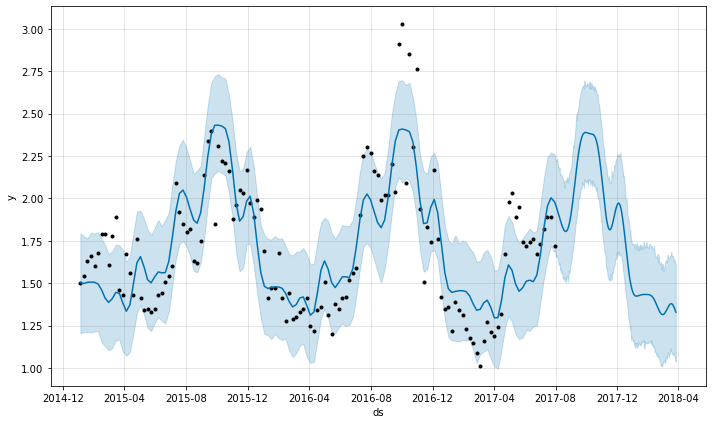

In [254]:
#смотрим, что предсказалось
fig1 = m.plot(forecast)

Сравним с тем, что было на самом деле в этот период:

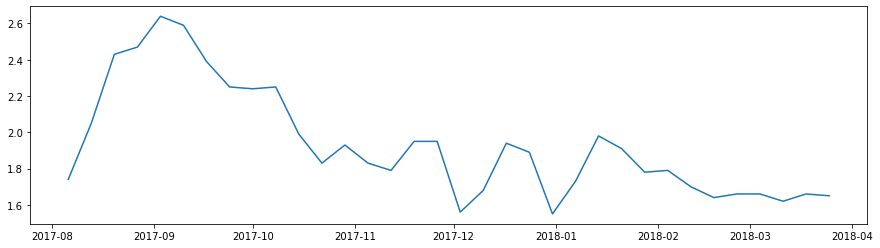

In [255]:
plt.figure(figsize=(15,4))
plt.plot(test_price['ds'], test_price['y'])
plt.show()

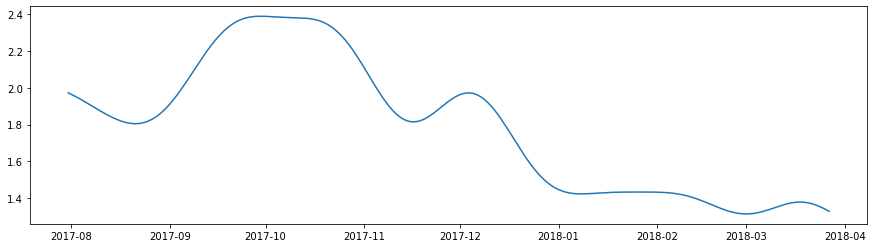

In [256]:
plt.figure(figsize=(15,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.show()

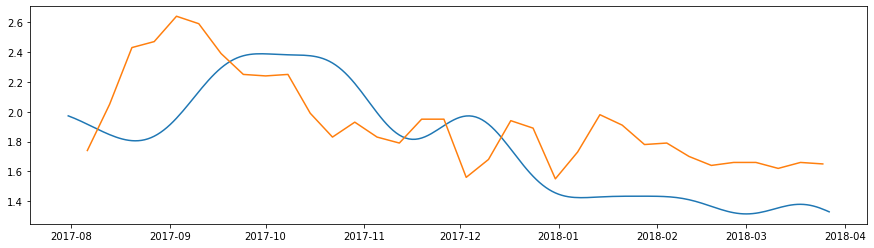

In [257]:
plt.figure(figsize=(15,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.plot(test_price['ds'], test_price['y'])
plt.show()